In [1]:
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import flowviz

In [7]:
video = np.load('sample_data/CDKL5_ependymal-10-video.npy')
flow = np.load('sample_data/CDKL5_ependymal-10-flow.npy')
curl = np.load('sample_data/CDKL5_ependymal-10-curl.npy')
print('video: {}'.format(video.shape))
print('flow: {}'.format(flow.shape))
print('curl: {}'.format(curl.shape))

video: (25, 480, 640)
flow: (25, 480, 640, 2)
curl: (25, 480, 640)


# Output animation formats

### 1. Movie

##### Save as lossy mp4

In [ ]:
flowanim = flowviz.FlowAnimation(video, flow, vector_step=10)
flowanim.save('flow-animation.mp4')
# Video('flow-animation.mp4')

##### Save as lossless avi

In [ ]:
flowanim = flowviz.FlowAnimation(video, flow, vector_step=10)
flowanim.save('flow-animation.avi', codec='ffv1')

### 2. Array of RGBA images

In [ ]:
flowanim = flowviz.FlowAnimation(video, flow, vector_step=10)
rgba = flowanim.to_rgba()

fig = plt.figure(figsize=(12, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.05, add_all=True)
for i in range(3):
    grid[i].imshow(rgba[i], interpolation='none')
plt.show()

# Options

### 1. Output size

In [ ]:
flowanim = flowviz.FlowAnimation(video, flow, vector_step=10, scale=0.5)
flowanim.save('flow-animation-small.mp4')
Video('flow-animation-small.mp4')

# Color flow

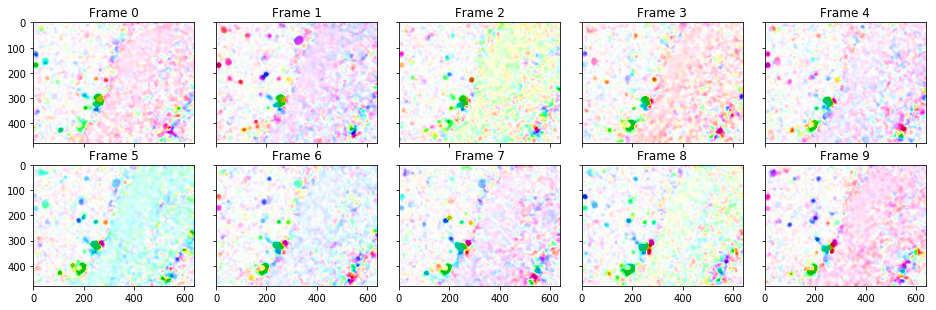

In [6]:
import flowviz.color_flow as colorflow

color = colorflow.motion_to_color(flow, maxmotion=0.5)

fig = plt.figure(figsize=(16, 12))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.3, add_all=True)
for i in range(10):
    grid[i].imshow(color[i], interpolation='none')
    grid[i].set_title('Frame {}'.format(i))
plt.show()